In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.utils import resample
import math

In [96]:
df = pd.read_csv("magic04.data", header=None)

In [97]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [98]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19020 non-null  float64
 1   1       19020 non-null  float64
 2   2       19020 non-null  float64
 3   3       19020 non-null  float64
 4   4       19020 non-null  float64
 5   5       19020 non-null  float64
 6   6       19020 non-null  float64
 7   7       19020 non-null  float64
 8   8       19020 non-null  float64
 9   9       19020 non-null  float64
 10  10      19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [100]:
gamma_df = df[df[10] == 'g']
hadron_df = df[df[10] == 'h']
gamma_undersampled = resample(gamma_df, 
                            replace=False,
                            n_samples=len(hadron_df),
                            random_state=42)
df = pd.concat([gamma_undersampled, hadron_df]).sample(frac=1, random_state=42).reset_index(drop=True)

In [101]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,16.2152,13.0743,2.4553,0.5431,0.3064,-10.3789,-13.1290,-0.1040,45.8852,185.6668,h
1,13.1500,10.9523,2.1477,0.7687,0.3950,-14.8886,2.6711,11.8531,28.5530,192.1400,g
2,126.0560,35.5809,3.5832,0.2854,0.1441,-30.9713,-139.7062,-33.4830,16.0535,324.4922,h
3,29.5490,14.1175,2.3692,0.3590,0.1902,37.1775,19.8095,-8.8034,0.9098,145.2470,g
4,69.2540,34.3016,3.1916,0.1173,0.1132,-30.2818,73.8184,21.3775,24.9091,279.9318,h


In [102]:
print(df.shape)
df.isnull().sum()

(13376, 11)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [103]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [104]:
y = df[10]
x = df.drop(columns=[10])

In [105]:
y = pd.get_dummies(y, drop_first=True)

In [106]:
y

,h
0,True
1,False
2,True
3,False
4,True
...,...
13371,True
13372,False
13373,False
13374,False


In [107]:
x

,0,1,2,3,4,5,6,7,8,9
0,16.2152,13.0743,2.4553,0.5431,0.3064,-10.3789,-13.1290,-0.1040,45.8852,185.6668
1,13.1500,10.9523,2.1477,0.7687,0.3950,-14.8886,2.6711,11.8531,28.5530,192.1400
2,126.0560,35.5809,3.5832,0.2854,0.1441,-30.9713,-139.7062,-33.4830,16.0535,324.4922
3,29.5490,14.1175,2.3692,0.3590,0.1902,37.1775,19.8095,-8.8034,0.9098,145.2470
4,69.2540,34.3016,3.1916,0.1173,0.1132,-30.2818,73.8184,21.3775,24.9091,279.9318
...,...,...,...,...,...,...,...,...,...,...
13371,34.7228,13.3626,2.6191,0.4639,0.2368,-43.1927,13.5598,-5.3328,42.6660,130.7520
13372,23.8603,14.8311,2.4224,0.5104,0.2703,-9.5178,-12.7220,12.4322,0.5570,98.4508
13373,40.9787,17.3368,2.8582,0.3410,0.1823,38.1097,39.5081,-9.6327,16.1810,148.8410
13374,23.8026,10.1636,2.2625,0.5628,0.3087,32.1961,-16.3031,-9.6851,20.3915,108.5820


In [108]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [109]:
x

array([[-0.87380196, -0.50801129, -0.81244676, ..., -0.01516507,
         0.53532282, -0.12587485],
       [-0.93897801, -0.60958682, -1.45884244, ...,  0.50020047,
        -0.1072846 , -0.04110645],
       [ 1.46176815,  0.56933083,  1.55774079, ..., -1.45384054,
        -0.57071518,  1.69208336],
       ...,
       [-0.34724998, -0.30397466,  0.03421391, ..., -0.42586362,
        -0.565988  , -0.60811921],
       [-0.71246934, -0.64734018, -1.21759984, ..., -0.42812212,
        -0.4098798 , -1.1353223 ],
       [-0.48322621, -0.32068532, -0.59768201, ...,  0.29421545,
        -1.16044491, -0.77711387]])

## Method 1: Grid Search

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=123)

print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (11369, 10)
Test feature set size: (2007, 10)
Training variable set size: (11369, 1)
Test variable set size: (2007, 1)


In [111]:
model = KNeighborsClassifier()

In [112]:
hyper_parms = [
    {'n_neighbors': range(1, int(np.sqrt(x_train.shape[0]))), 'metric': ['euclidean']},
    {'n_neighbors': range(1, int(np.sqrt(x_train.shape[0]))), 'metric': ['manhattan']}
]


In [113]:
hyper_parms

[{'n_neighbors': range(1, 106), 'metric': ['euclidean']},
 {'n_neighbors': range(1, 106), 'metric': ['manhattan']}]

In [114]:
grid_search = GridSearchCV(model, hyper_parms, cv=5, scoring='accuracy')

In [115]:
grid_search.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean'],
                          'n_neighbors': range(1, 106)},
                         {'metric': ['manhattan'],
                          'n_neighbors': range(1, 106)}],
             scoring='accuracy')

In [116]:
best_k = grid_search.best_params_['n_neighbors']
print(best_k)
best_metric = grid_search.best_params_['metric']
best_metric

19


'manhattan'

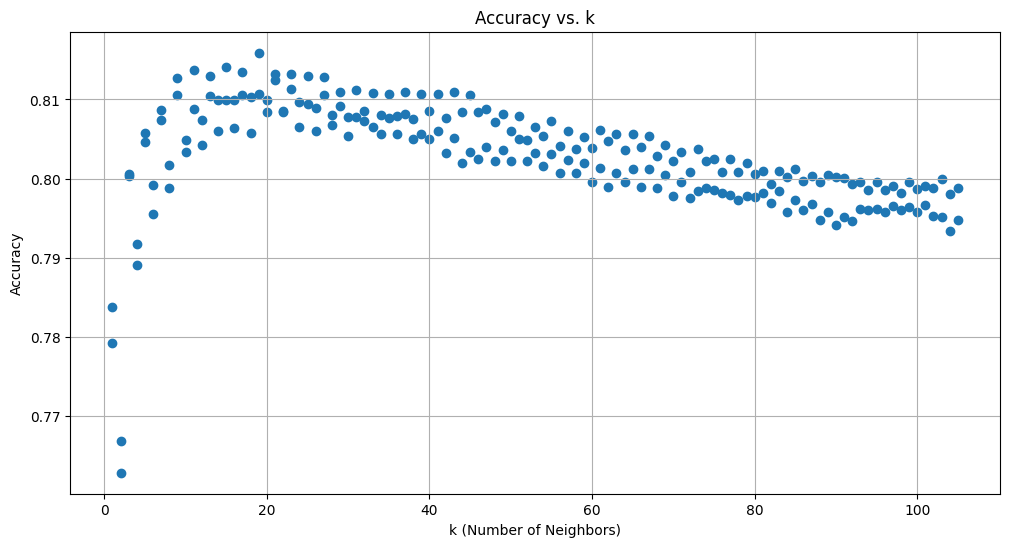

In [117]:
results = grid_search.cv_results_
k_values = results['param_n_neighbors'].data
accuracy_scores = results['mean_test_score']
plt.figure(figsize=(12, 6))
plt.scatter(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.grid(True)

In [118]:
knn_best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best_model.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [141]:
y_test_pred = knn_best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
fscore = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8126557050323866
Precision: 0.8893034825870647
Recall: 0.7135728542914171
F1 Score: 0.7918050941306756

Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.91      0.83      1005
        True       0.89      0.71      0.79      1002

    accuracy                           0.81      2007
   macro avg       0.83      0.81      0.81      2007
weighted avg       0.83      0.81      0.81      2007


Confusion Matrix:
 [[916  89]
 [287 715]]


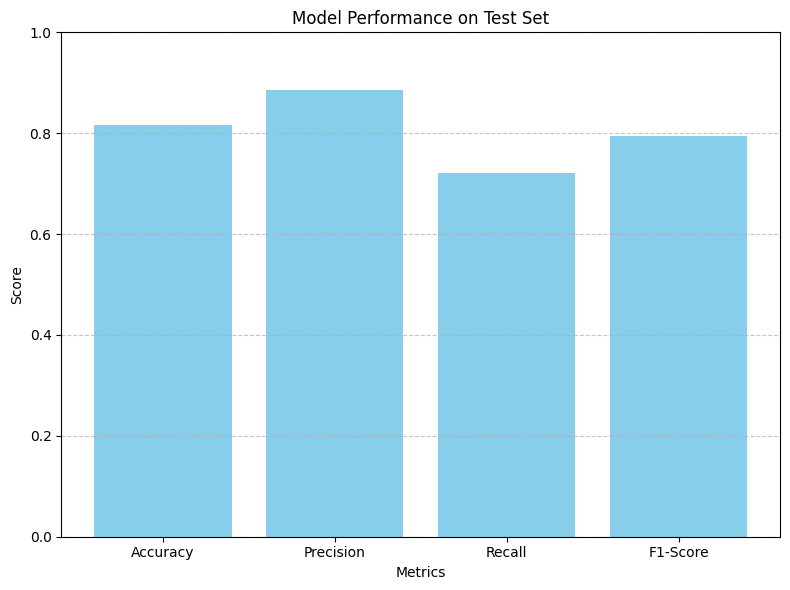

In [120]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, fscore]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis from 0 to 1
plt.title('Model Performance on Test Set')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

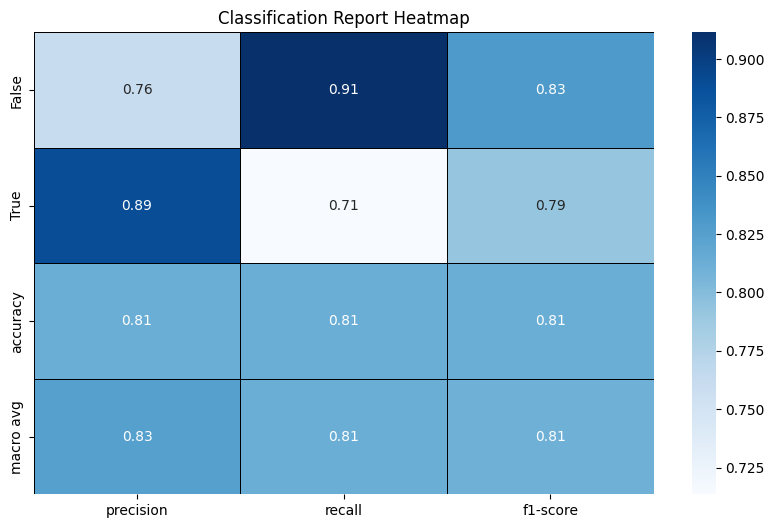

In [133]:
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title('Classification Report Heatmap')
plt.show()

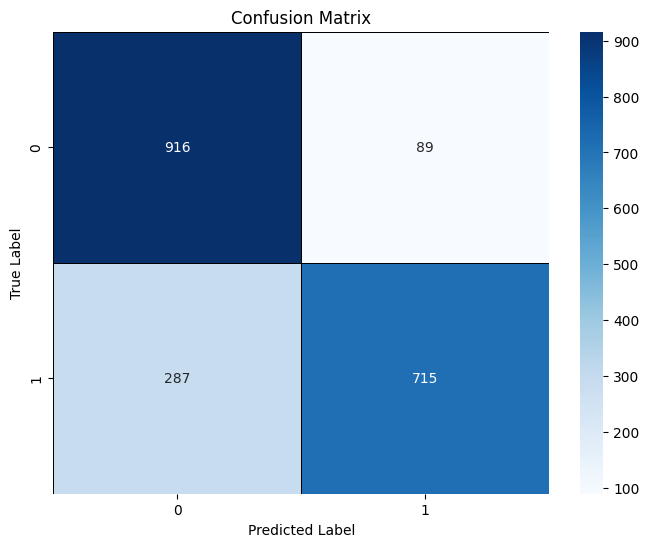

In [142]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Method 2: Manual Search

In [121]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.3, random_state=123)

x_validation, x_test, y_validation, y_test = train_test_split(x_, y_, test_size=0.5, random_state=123)

del(x_,y_)

print("Training feature set size:",x_train.shape)
print("Validation feature set size:",x_validation.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Validation variable set size:",y_validation.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (9363, 10)
Validation feature set size: (2006, 10)
Test feature set size: (2007, 10)
Training variable set size: (9363, 1)
Validation variable set size: (2006, 1)
Test variable set size: (2007, 1)


In [155]:
k_values = range(1, int(np.sqrt(x_train.shape[0])))
metrics = ["euclidean", "manhattan"]

In [156]:
best_k = None
best_accuracy = 0
best_metrics = None

In [157]:
for metric in metrics:
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(x_train, y_train)
        y_validation_pred = knn_model.predict(x_validation)
        validation_accuracy = accuracy_score(y_validation, y_validation_pred)

        if validation_accuracy > best_accuracy:
            best_k = k
            best_accuracy = validation_accuracy
            best_metric = metric
    

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

In [158]:
print(best_k)
print(best_accuracy)
print(best_metric)

1
0.9002991026919243
manhattan


In [159]:
knn_best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best_model.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [160]:
y_test_pred = knn_best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, output_dict=True)
fscore = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8006975585450922
Precision: 0.8212351029252438
Recall: 0.7633434038267876
F1 Score: 0.791231732776618

Classification Report:
 {'False': {'precision': 0.783210332103321, 'recall': 0.8372781065088757, 'f1-score': 0.8093422306959008, 'support': 1014.0}, 'True': {'precision': 0.8212351029252438, 'recall': 0.7633434038267876, 'f1-score': 0.791231732776618, 'support': 993.0}, 'accuracy': 0.8006975585450922, 'macro avg': {'precision': 0.8022227175142824, 'recall': 0.8003107551678317, 'f1-score': 0.8002869817362595, 'support': 2007.0}, 'weighted avg': {'precision': 0.8020237837356924, 'recall': 0.8006975585450922, 'f1-score': 0.8003817302306053, 'support': 2007.0}}

Confusion Matrix:
 [[849 165]
 [235 758]]


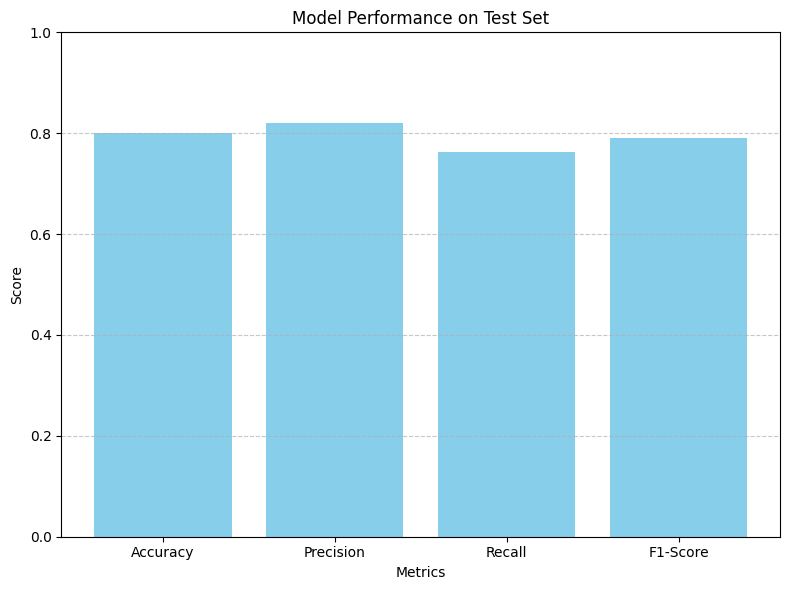

In [161]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, fscore]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis from 0 to 1
plt.title('Model Performance on Test Set')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

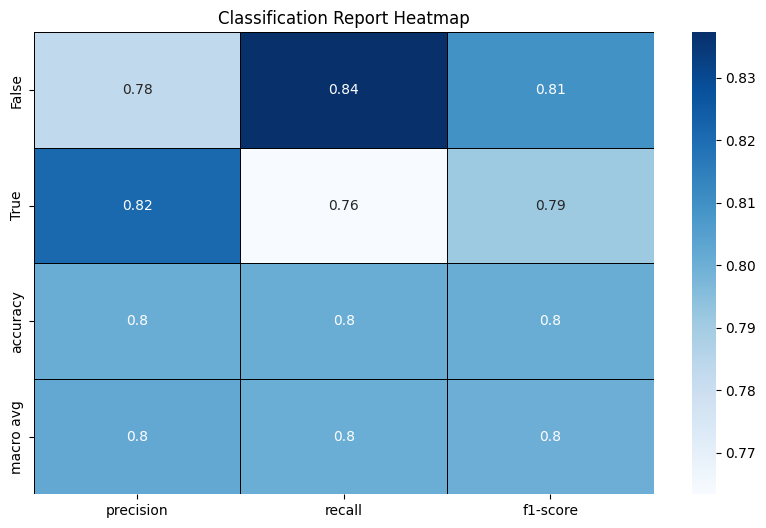

In [162]:
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title('Classification Report Heatmap')
plt.show()

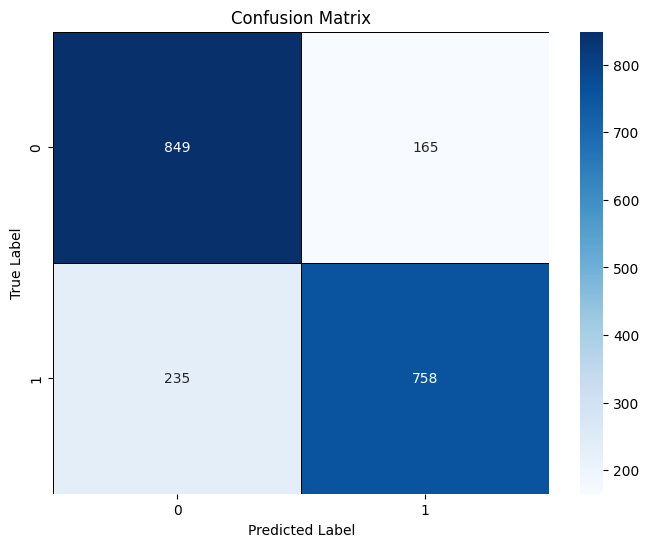

In [163]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Method 3: Random Search

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=123)

print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (11369, 10)
Test feature set size: (2007, 10)
Training variable set size: (11369, 1)
Test variable set size: (2007, 1)


In [147]:
hyper_parms = [
    {'n_neighbors': range(1, int(np.sqrt(x_train.shape[0]))), 'metric': ['euclidean']},
    {'n_neighbors': range(1, int(np.sqrt(x_train.shape[0]))), 'metric': ['manhattan']}
]

In [168]:
model = KNeighborsClassifier()
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=hyper_parms,
    n_iter=30,
    cv=5,  # 2-fold cross-validation
    scoring='accuracy',
    random_state=123
)

In [169]:
random_search.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions=[{'metric': ['euclidean'],
                                         'n_neighbors': range(1, 106)},
                                        {'metric': ['manhattan'],
                                         'n_neighbors': range(1, 106)}],
                   random_state=123, scoring='accuracy')

In [170]:
best_k = random_search.best_params_['n_neighbors']
best_metric = random_search.best_params_['metric']

print(best_k)
print(best_metric)

15
manhattan


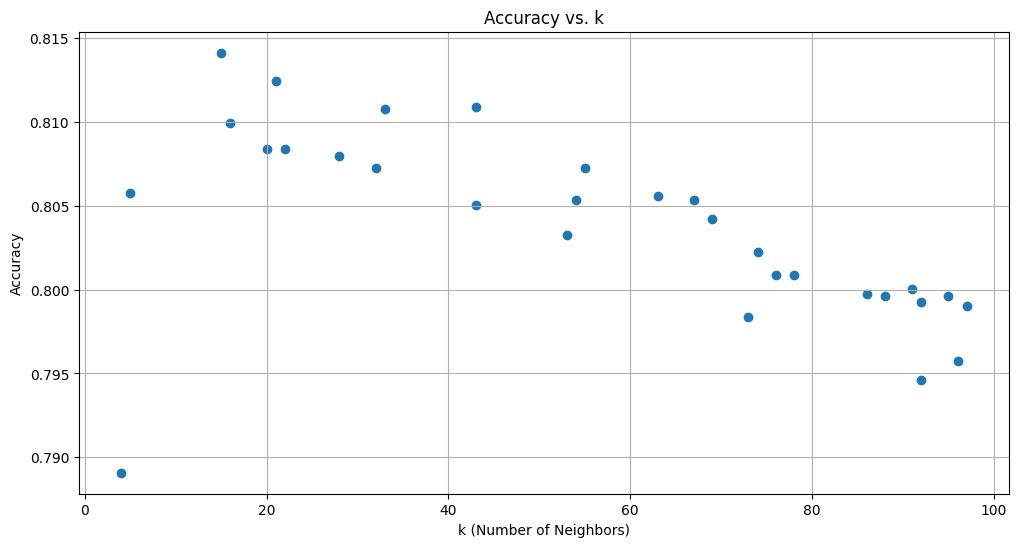

In [171]:
results = random_search.cv_results_
k_values = results['param_n_neighbors'].data
accuracy_scores = results['mean_test_score']
plt.figure(figsize=(12, 6))
plt.scatter(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.grid(True)

In [164]:
knn_best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

In [173]:
knn_best_model.fit(x_train, y_train)
y_test_pred = knn_best_model.predict(x_test)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [175]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, output_dict=True)
fscore = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8006975585450922
Precision: 0.8212351029252438
Recall: 0.7633434038267876
F1 Score: 0.791231732776618

Classification Report:
 {'False': {'precision': 0.783210332103321, 'recall': 0.8372781065088757, 'f1-score': 0.8093422306959008, 'support': 1014.0}, 'True': {'precision': 0.8212351029252438, 'recall': 0.7633434038267876, 'f1-score': 0.791231732776618, 'support': 993.0}, 'accuracy': 0.8006975585450922, 'macro avg': {'precision': 0.8022227175142824, 'recall': 0.8003107551678317, 'f1-score': 0.8002869817362595, 'support': 2007.0}, 'weighted avg': {'precision': 0.8020237837356924, 'recall': 0.8006975585450922, 'f1-score': 0.8003817302306053, 'support': 2007.0}}

Confusion Matrix:
 [[849 165]
 [235 758]]


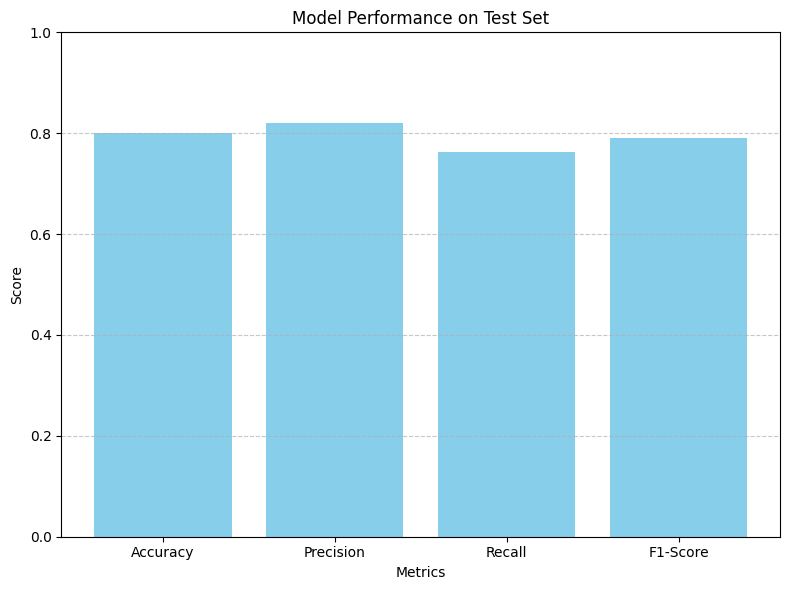

In [176]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, fscore]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis from 0 to 1
plt.title('Model Performance on Test Set')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

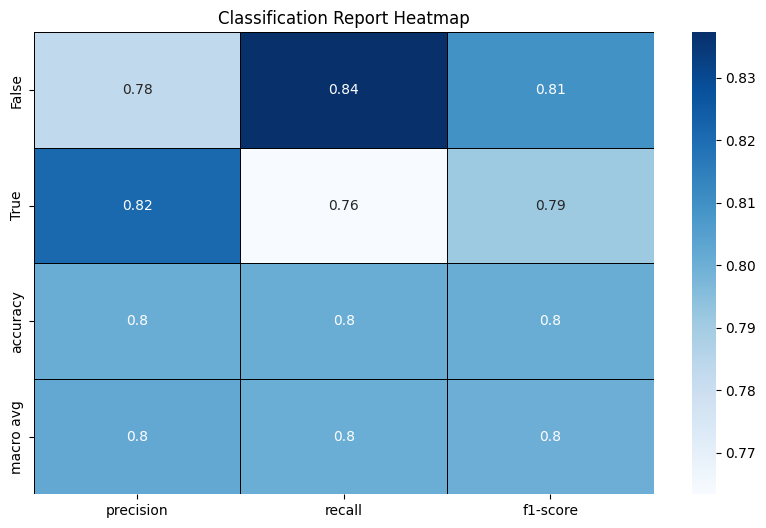

In [177]:
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title('Classification Report Heatmap')
plt.show()

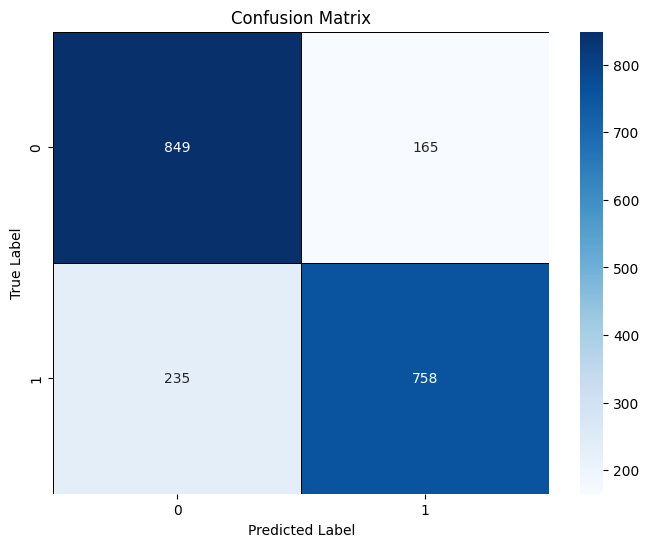

In [178]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()